In [164]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# let's import the CSV file first
df = pd.read_csv('data/ds_salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [161]:
# let's make experience level values more readable
df['experience_level'] = df['experience_level'].replace({'SE': 'Senior', 'EN': 'Entry level', 'EX': 'Executive level', 'MI': 'Intermediate level'})

### Basic tasks
0. See if there is any important missing data
1. Throw away all the records where *employment_type* != *FT* (fulltime). This is to get rid of the obvious aspect - people who work more hours get paid more for the same job.
2. Find **Mean**, **Median**, **Variance**, **Standard Deviation**, **Range**, **IQR**, **MAD** and of the *salary_in_usd* column.
3. Draw a **boxplot** of the *salary_in_usd* column.
4. Draw a **histogram** of the *salary_in_usd* column.
5. Draw a **density plot** of the *salary_in_usd* column on top of a histogram.
6. Find **modes** of the *experience_level*, *job_title*, *employee_residence*, *company_location*, *remote_ratio* and *company_size* columns.
7. Draw **bar charts** of the *experience_level*, *job_title*, *employee_residence*, *company_location*, *remote_ratio* and *company_size* columns.
8. Draw a **boxplot** of the *salary_in_usd* column grouped by the *experience_level* column.
9. Draw a **violin plot** of the *salary_in_usd* column grouped by the *experience_level* column.
10. Draw a **boxplot** of the *salary_in_usd* column grouped by the *company_location* column.
11. Draw a **violin plot** of the *salary_in_usd* column grouped by the *company_location* column.
12. Draw a **boxplot** of the *salary_in_usd* column grouped by the *remote_ratio* column.
13. Draw a **violin plot** of the *salary_in_usd* column grouped by the *remote_ratio* column.
14. Draw a **boxplot** of the *salary_in_usd* column grouped by the *company_size* column.
15. Draw a **violin plot** of the *salary_in_usd* column grouped by the *company_size* column.

### Advanced tasks
15. Draw a map with the average salaries of data analysts in different states.

### Even More Advanced tasks (a.k.a. let's dive deeper)
- In which jobs do people in the US have higher salaries for the same experience level and than people in the EU?
- Do people in larger companies have higher salaries for the same experience level and job title than people in smaller companies?
- What is the difference in salaries of people who work in the US but live elsewhere and people who work and live in the US?
    - Hint: be careful about distribution of experience levels and job titles in the two groups
- Do people who work fully remotely (based on *remote_ratio*) have higher salaries for the same experience level and job title than people who work partially or not remote at all?
- Draw a map with the average salaries of data analysts in different states.

In [127]:
# 0.
print(df.query('salary_in_usd == "0"'), "\n\n")  # are there any apparent errors (0 as a salary)?
print(df['salary_in_usd'].isnull().sum(), "\n\n")  # are there any invalid numeric values?
print(df['experience_level'].value_counts(dropna=False), "\n\n")
print(df['job_title'].value_counts(dropna=False), "\n\n")
print(df['employee_residence'].value_counts(dropna=False), "\n\n")
print(df['company_location'].value_counts(dropna=False), "\n\n")
print(df['remote_ratio'].value_counts(dropna=False), "\n\n")
print(df['company_size'].value_counts(dropna=False), "\n\n")

Empty DataFrame
Columns: [work_year, experience_level, employment_type, job_title, salary, salary_currency, salary_in_usd, employee_residence, remote_ratio, company_location, company_size, salary_in_100k]
Index: [] 


0 


experience_level
Senior                2511
Intermediate level     792
Entry level            302
Executive level        113
Name: count, dtype: int64 


job_title
Data Engineer                1037
Data Scientist                836
Data Analyst                  606
Machine Learning Engineer     288
Analytics Engineer            102
                             ... 
Deep Learning Researcher        1
Data DevOps Engineer            1
BI Data Engineer                1
Software Data Engineer          1
Finance Data Analyst            1
Name: count, Length: 92, dtype: int64 


employee_residence
US    2996
GB     167
CA      84
ES      78
IN      68
      ... 
IL       1
MK       1
CR       1
SK       1
MT       1
Name: count, Length: 73, dtype: int64 


company_location


In [11]:
# 1.
df = df[df['employment_type'] == 'FT']

In [12]:
# 2.
print('Mean: ', df['salary_in_usd'].mean())
print('Median: ', df['salary_in_usd'].median())
print('Variance: ', df['salary_in_usd'].var())
print('Standard Deviation: ', df['salary_in_usd'].std())
print('Range: ', df['salary_in_usd'].max() - df['salary_in_usd'].min())
print('IQR: ', df['salary_in_usd'].quantile(0.75) - df['salary_in_usd'].quantile(0.25))
print('MAD: ', stats.median_abs_deviation(df['salary_in_usd']))

Mean:  138314.1995696611
Median:  135000.0
Variance:  3900274488.640817
Standard Deviation:  62452.177613281165
Range:  444868
IQR:  79476.0
MAD:  40000.0


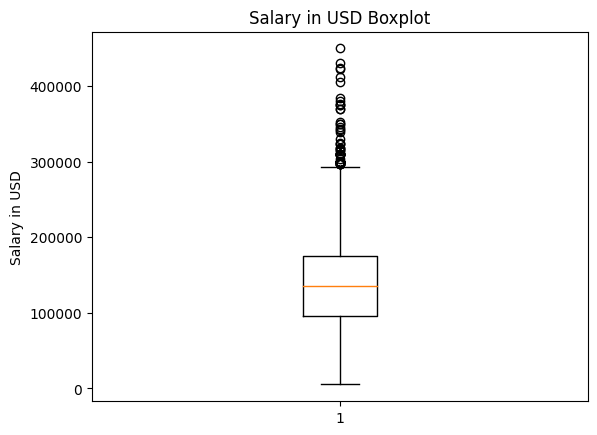

In [22]:
# 3. let's not use df.boxplot() because it's not very customizable
fig, ax = plt.subplots()
ax.boxplot(df['salary_in_usd'])
ax.set_ylabel('Salary in USD')
ax.set_title('Salary in USD Boxplot')
plt.show()

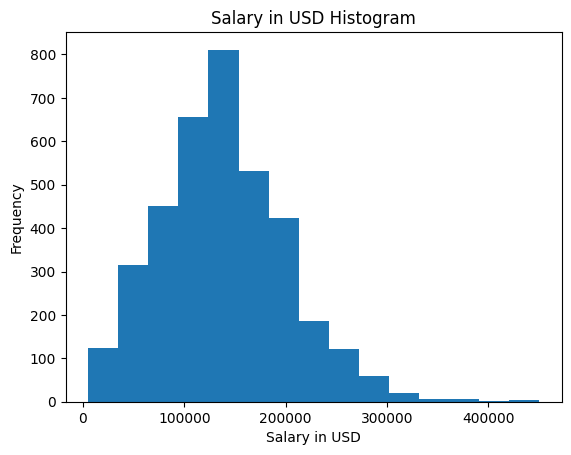

In [67]:
# 4.
fig, ax = plt.subplots()
ax.hist(df['salary_in_usd'], bins=15)
ax.set_xlabel('Salary in USD')
ax.set_ylabel('Frequency')
ax.set_title('Salary in USD Histogram')
plt.show()

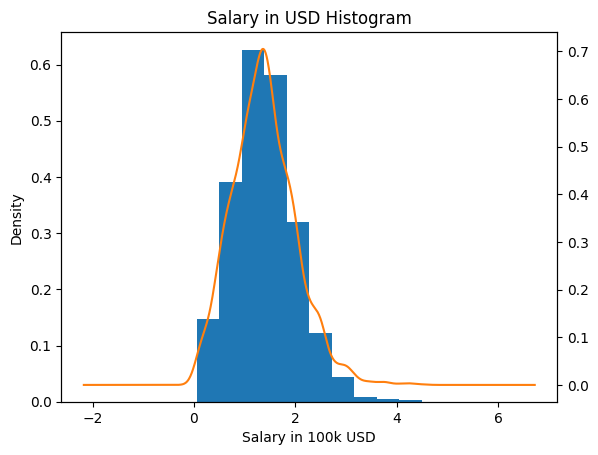

In [70]:
# 5.
# let's transform the salary to 100k USD to make the plot more readable (especially the KDE as it was in 1e-6 range)
df['salary_in_100k'] = df['salary_in_usd'] / 100000
fig, ax = plt.subplots()
ax.hist(df['salary_in_100k'], density=True, bins=10)
ax.set_xlabel('Salary in 100k USD')
ax.set_ylabel('Frequency')
ax.set_title('Salary in USD Histogram')
df['salary_in_100k'].plot.kde(ax=ax, secondary_y=True)
plt.show()

In [143]:
# 6.
print("Mode of Experience Level: ", df['experience_level'].mode()[0])
print("Mode of Job Title: ", df['job_title'].mode()[0])
print("Mode of Employee Residence: ", df['employee_residence'].mode()[0])
print("Mode of Company Location: ", df['company_location'].mode()[0])
print("Mode of Remote Ratio: ", df['remote_ratio'].mode()[0])
print("Mode of Company Size: ", df['company_size'].mode()[0])

Mode of Experience Level:  Senior
Mode of Job Title:  Data Engineer
Mode of Employee Residence:  US
Mode of Company Location:  US
Mode of Remote Ratio:  0
Mode of Company Size:  M


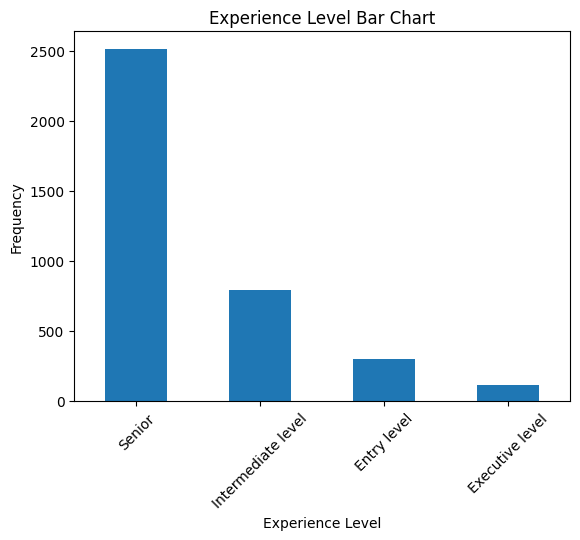

In [144]:
# 7. Draw a bar chart of the experience_level column.
fig, ax = plt.subplots()
df['experience_level'].value_counts().plot.bar(ax=ax, rot=45)
ax.set_xlabel('Experience Level')
ax.set_ylabel('Frequency')
ax.set_title('Experience Level Bar Chart')
plt.show()

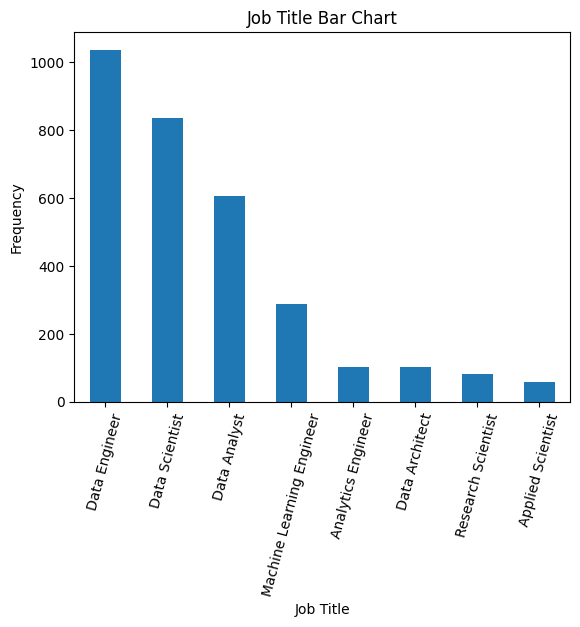

In [145]:
# Draw a bar chart of the job_title column.
fig, ax = plt.subplots()
# drawing only top 8 job titles as there are too many of them
df['job_title'].value_counts().head(8).plot.bar(ax=ax, rot=75)
ax.set_xlabel('Job Title')
ax.set_ylabel('Frequency')
ax.set_title('Job Title Bar Chart')
plt.show()

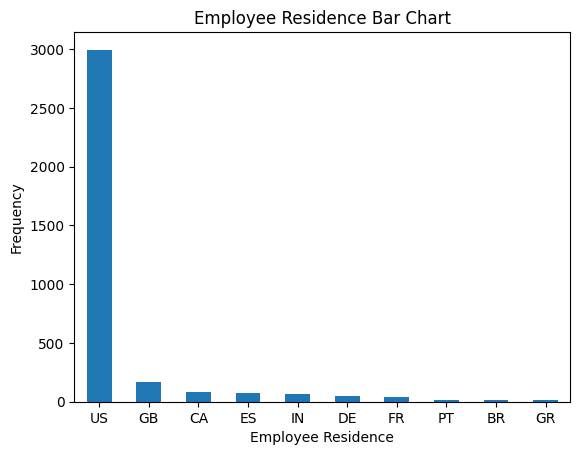

In [146]:
# Draw a bar chart of employee_residence column.
fig, ax = plt.subplots()
# only top 10 results to make the plot readable
df['employee_residence'].value_counts().head(10).plot.bar(ax=ax, rot=0)
ax.set_xlabel('Employee Residence')
ax.set_ylabel('Frequency')
ax.set_title('Employee Residence Bar Chart')
plt.show()

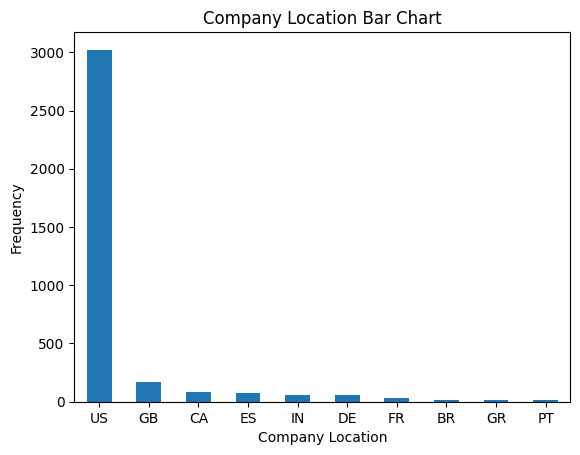

In [147]:
# Draw a bar chart of the company_location column.
fig, ax = plt.subplots()
# only top 10 results to make the plot readable
df['company_location'].value_counts().head(10).plot.bar(ax=ax, rot=0)
ax.set_xlabel('Company Location')
ax.set_ylabel('Frequency')
ax.set_title('Company Location Bar Chart')
plt.show()

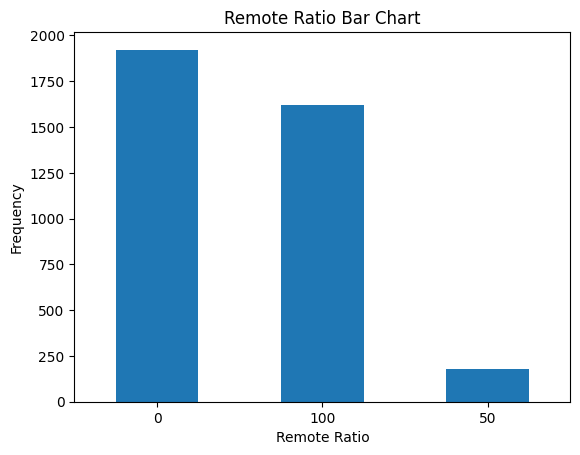

In [148]:
# Draw a bar chart of the remote_ratio column.
fig, ax = plt.subplots()
df['remote_ratio'].value_counts().plot.bar(ax=ax, rot=0)
ax.set_xlabel('Remote Ratio')
ax.set_ylabel('Frequency')
ax.set_title('Remote Ratio Bar Chart')
plt.show()

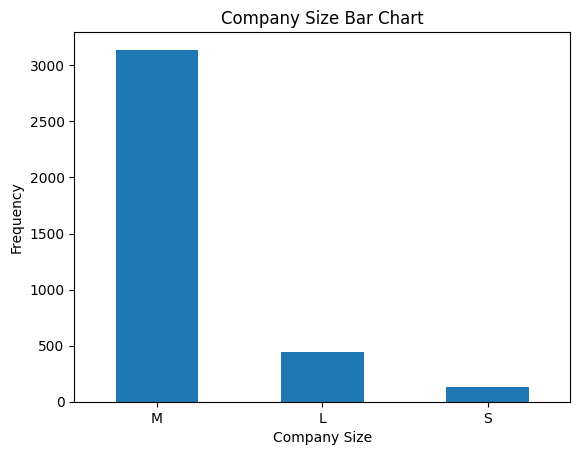

In [149]:
# Draw a bar chart of the company_size column.
fig, ax = plt.subplots()
df['company_size'].value_counts().plot.bar(ax=ax, rot=0)
ax.set_xlabel('Company Size')
ax.set_ylabel('Frequency')
ax.set_title('Company Size Bar Chart')
plt.show()

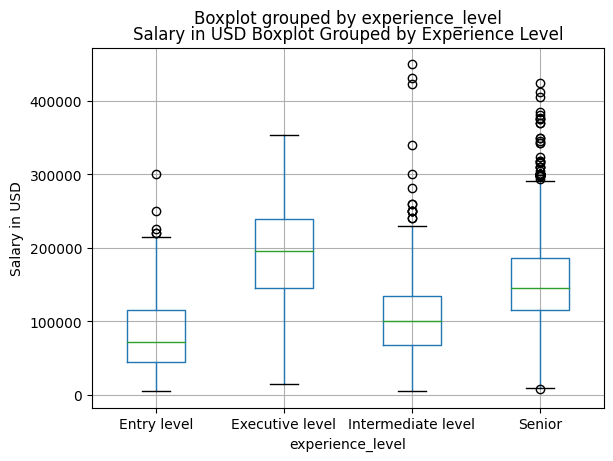

In [150]:
# 8. Draw a boxplot of the salary_in_usd column grouped by the experience_level column.
fig, ax = plt.subplots()
df.boxplot(column='salary_in_usd', by='experience_level', ax=ax)
ax.set_ylabel('Salary in USD')
ax.set_title('Salary in USD Boxplot Grouped by Experience Level')
plt.show()

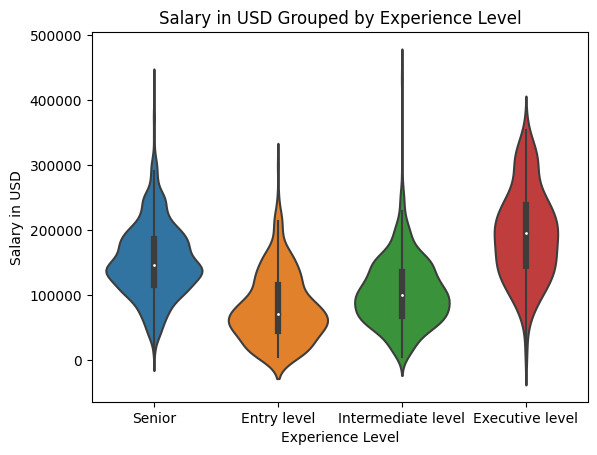

In [172]:
# 9. Draw a violin plot of the salary_in_usd column grouped by the experience_level column.
sns.violinplot(x="experience_level", y="salary_in_usd", data=df)
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.title('Salary in USD Grouped by Experience Level')
plt.show()

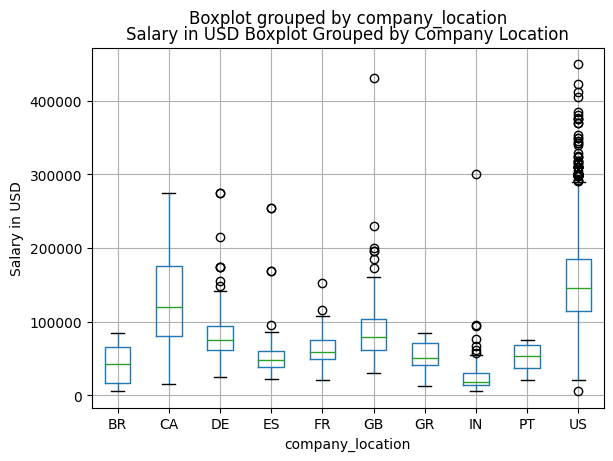

In [160]:
# 10. Draw a **boxplot** of the *salary_in_usd* column grouped by the *company_location* column.
fig, ax = plt.subplots()
# only top 10 results to make the plot readable
top_10_locations = df['company_location'].value_counts().head(10).index
df[df['company_location'].isin(top_10_locations)].boxplot(column='salary_in_usd', by='company_location', ax=ax)
ax.set_ylabel('Salary in USD')
ax.set_title('Salary in USD Boxplot Grouped by Company Location')
plt.show()

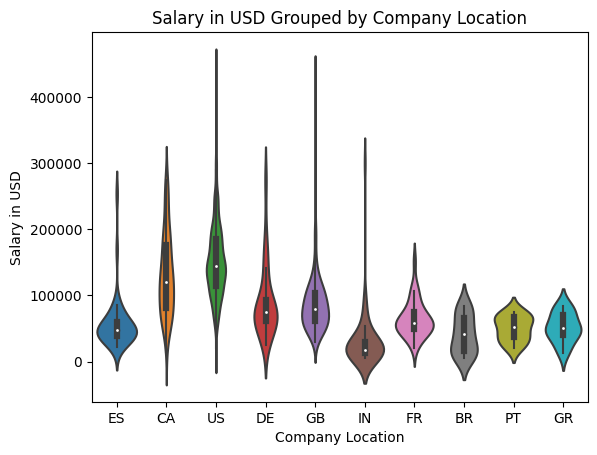

In [175]:
# 11. Draw a **violin plot** of the *salary_in_usd* column grouped by the *company_location* column.

# only top 10 results to make the plot readable
top_10_locations = df['company_location'].value_counts().head(10).index
sns.violinplot(x="company_location", y="salary_in_usd", data=df[df['company_location'].isin(top_10_locations)])
plt.xlabel('Company Location')
plt.ylabel('Salary in USD')
plt.title('Salary in USD Grouped by Company Location')
plt.show()

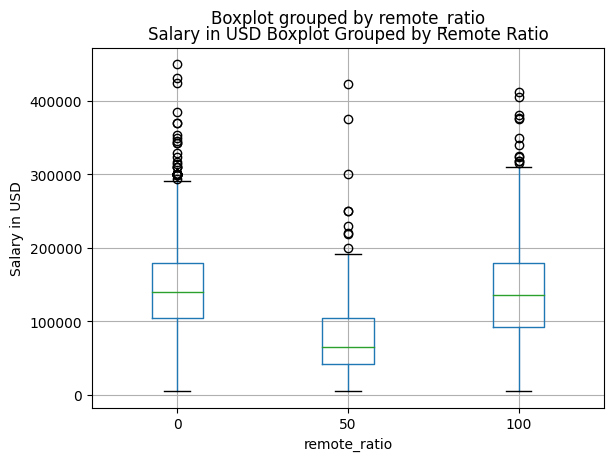

In [156]:
# 12. Draw a **boxplot** of the *salary_in_usd* column grouped by the *remote_ratio* column.
fig, ax = plt.subplots()
df.boxplot(column='salary_in_usd', by='remote_ratio', ax=ax)
ax.set_ylabel('Salary in USD')
ax.set_title('Salary in USD Boxplot Grouped by Remote Ratio')
plt.show()

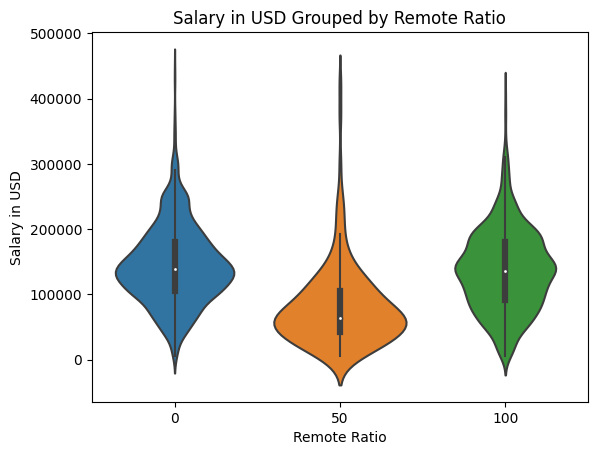

In [176]:
# 13. Draw a **violin plot** of the *salary_in_usd* column grouped by the *remote_ratio* column.
sns.violinplot(x="remote_ratio", y="salary_in_usd", data=df)
plt.xlabel('Remote Ratio')
plt.ylabel('Salary in USD')
plt.title('Salary in USD Grouped by Remote Ratio')
plt.show()

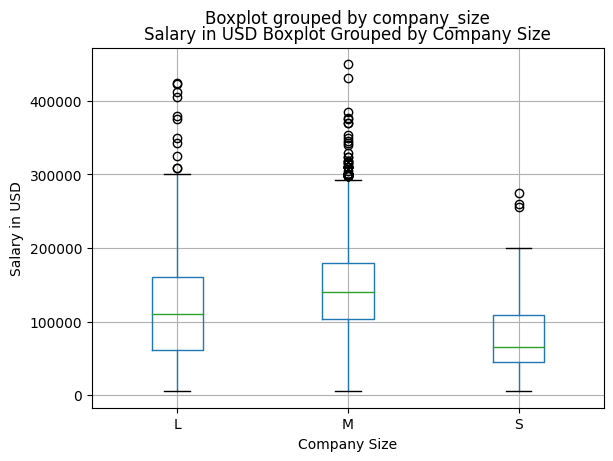

In [177]:
# 14. Draw a **boxplot** of the *salary_in_usd* column grouped by the *company_size* column.
fig, ax = plt.subplots()
df.boxplot(column='salary_in_usd', by='company_size', ax=ax)
ax.set_xlabel('Company Size')
ax.set_ylabel('Salary in USD')
ax.set_title('Salary in USD Boxplot Grouped by Company Size')
plt.show()

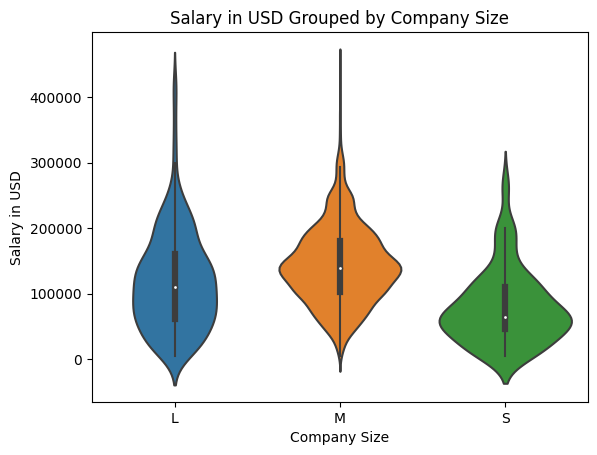

In [178]:
# 15. Draw a **violin plot** of the *salary_in_usd* column grouped by the *company_size* column.
sns.violinplot(x="company_size", y="salary_in_usd", data=df)
plt.xlabel('Company Size')
plt.ylabel('Salary in USD')
plt.title('Salary in USD Grouped by Company Size')
plt.show()